## CSC14005 – MACHINE LEARNING
## FINAL PROJECT

### Students
- Le Hoang Sang - 21127158
- Tran Minh Quang - 21127

### Prepare libs 

In [104]:
import fashion_mnist.utils.mnist_reader as mnist_reader
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
import time
import numpy as np
import matplotlib.pyplot as plt

X_train_org, y_train_org = mnist_reader.load_mnist('fashion_mnist/data/fashion', kind='train')
X_test_org, y_test_org = mnist_reader.load_mnist('fashion_mnist/data/fashion', kind='t10k')

In [105]:
# normalize data
X_train_org = X_train_org / 255
X_test_org = X_test_org / 255
X_train_org.shape

(60000, 784)

In [106]:
y_train_org.shape

(60000,)

In [107]:
best_model = None
best_val_err = 2



# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_val, y_train, y_val = train_test_split(X_train_org, y_train_org, test_size=0.2, random_state=42)

num_test = 1000
# X_train, X_val, y_train, y_val = X_train[:num_test,], X_val[:num_test,], y_train[:num_test], y_val[:num_test]
print(X_train.shape)
print(X_val.shape)

(48000, 784)
(12000, 784)


### Using Linear Kernel

In [97]:
#linear model

err_linear_train = []
err_linear_val = []
training_time_linear = []

# Tạo danh sách các giá trị C bạn muốn thử nghiệm
# C_values = [0.1, 1.0, 7.0, 13, 50]
C_values = [0.01, 0.1, 1.0, 7.0, 13, 20, 50, 100]



for C in C_values:
    # Bắt đầu đo thời gian
    start_time = time.time()

    # Tạo và huấn luyện mô hình với giá trị C hiện tại
    model_linear = SVC(kernel='linear', C=C, decision_function_shape='ovo') #ovo one vs one
    model_linear.fit(X_train, y_train)

    # Đo thời gian huấn luyện
    training_time = time.time() - start_time

    # Tính độ lỗi trên tập huấn luyện
    train_error = 1 - model_linear.score(X_train, y_train)


    # Tính độ lỗi trên tập validation

    val_error = 1 - model_linear.score(X_val, y_val)

    # Lưu lại độ lỗi của tập huấn luyện và tập validation
    err_linear_train.append(train_error)
    err_linear_val.append(val_error)

    # Lưu lại thời gian huấn luyện
    training_time_linear.append(training_time)

    if (val_error < best_val_err):
        best_val_err = val_error
        best_model = model_linear
    # In ra kết quả
    print(f"C={C} - Training Error: {train_error:.4f}, Validation Error: {val_error:.4f}, Training Time: {training_time:.2f} seconds, number of support vectors: {len(model_linear.support_vectors_)}")

C=0.01 - Training Error: 0.1560, Validation Error: 0.2220, Training Time: 0.10 seconds, number of support vectors: 674
C=0.1 - Training Error: 0.0390, Validation Error: 0.1720, Training Time: 0.09 seconds, number of support vectors: 588
C=1.0 - Training Error: 0.0000, Validation Error: 0.1830, Training Time: 0.07 seconds, number of support vectors: 582
C=7.0 - Training Error: 0.0000, Validation Error: 0.1830, Training Time: 0.08 seconds, number of support vectors: 582
C=13 - Training Error: 0.0000, Validation Error: 0.1830, Training Time: 0.08 seconds, number of support vectors: 582
C=20 - Training Error: 0.0000, Validation Error: 0.1830, Training Time: 0.07 seconds, number of support vectors: 582
C=50 - Training Error: 0.0000, Validation Error: 0.1830, Training Time: 0.08 seconds, number of support vectors: 582
C=100 - Training Error: 0.0000, Validation Error: 0.1830, Training Time: 0.08 seconds, number of support vectors: 582


### Comment results

### Using RBF Kernel

In [108]:
# RBF model

# Tạo danh sách các giá trị C và gamma bạn muốn thử nghiệm
C_values = [0.01, 0.1, 1.0, 7.0, 13, 20, 50, 100]
gamma_values = ['auto', 0.1, 0.5, 1.0, 2.0]

err_rbf_train = [] # mảng 2 chiều mỗi dòng là một giá trị gamma, mỗi cột là một giá trị C
err_rbf_val = []
training_time_rbf = []

for gamma in gamma_values:
    err_rbf_train.append([])
    err_rbf_val.append([])
    training_time_rbf.append([])
    print('----------------------------------')
    print(f"Gamma={gamma}")

    for  C in C_values:
        # Bắt đầu đo thời gian
        start_time = time.time()

        # Tạo và huấn luyện mô hình với giá trị C và gamma hiện tại
        model_rbf = SVC(kernel='rbf', C=C, gamma=gamma,  decision_function_shape='ovo')
        model_rbf.fit(X_train, y_train)

        # Đo thời gian huấn luyện
        training_time = time.time() - start_time

        # Tính độ lỗi trên tập huấn luyện
        train_error = 1 - model_rbf.score(X_train, y_train)

        # Tính độ lỗi trên tập validation
        val_error = 1 - model_rbf.score(X_val, y_val)

        # Lưu lại độ lỗi của tập huấn luyện và tập validation
        err_rbf_train[-1].append(train_error)
        err_rbf_val[-1].append(val_error)
        
        # Lưu lại thời gian huấn luyện
        training_time_rbf[-1].append(training_time)

        if (val_error < best_val_err):
            best_val_err = val_error
            best_model = model_linear
        # In ra kết quả
        print(f"C={C}, gamma={gamma} - Training Error: {train_error:.4f}, Validation Error: {val_error:.4f}, Training Time: {training_time:.2f} seconds, number of support vectors: {len(model_linear.support_vectors_)}")

----------------------------------
Gamma=auto


### Comment results

#### Tranning error

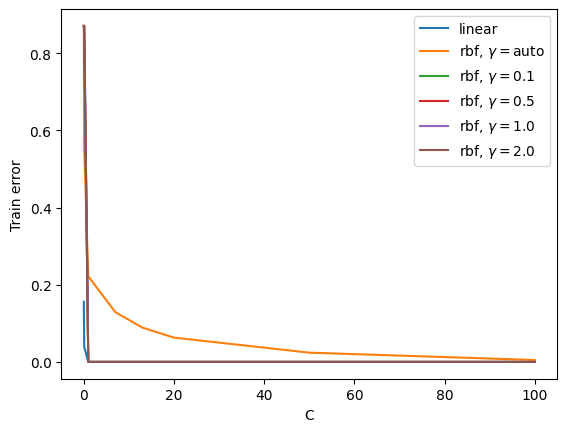

In [99]:
plt.plot(C_values, err_linear_train,label=r'linear')

for i in range(len(gamma_values)):
    plt.plot(C_values, err_rbf_train[i],label=r'rbf, $\gamma=$'+str(gamma_values[i]))

plt.xlabel('C')
plt.ylabel('Train error')

plt.legend()
plt.show()

#### Validation error

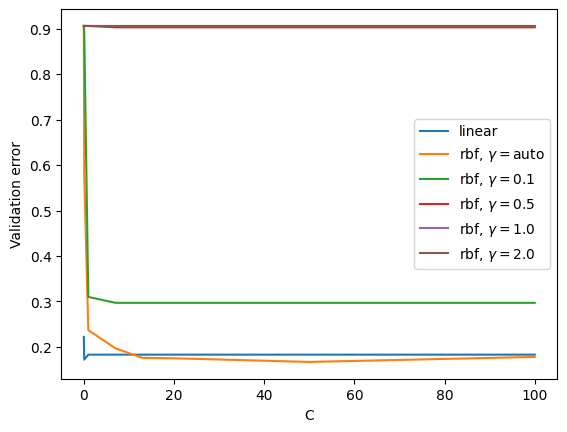

In [100]:
plt.plot(C_values, err_linear_val, label=r'linear')

for i in range(len(gamma_values)):
    plt.plot(C_values, err_rbf_val[i], label=r'rbf, $\gamma=$' + str(gamma_values[i]))

plt.xlabel('C')
plt.ylabel('Validation error')

plt.legend()
plt.show()


#### Tranning time

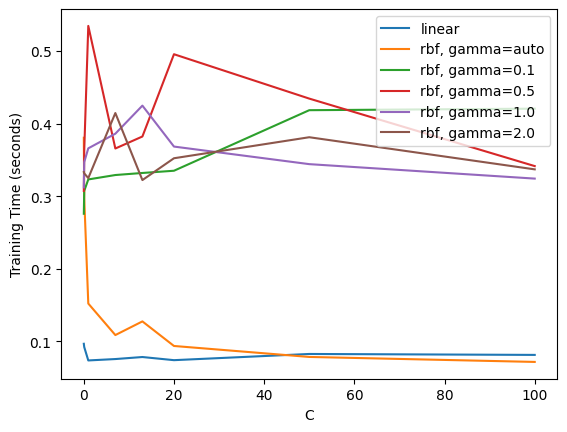

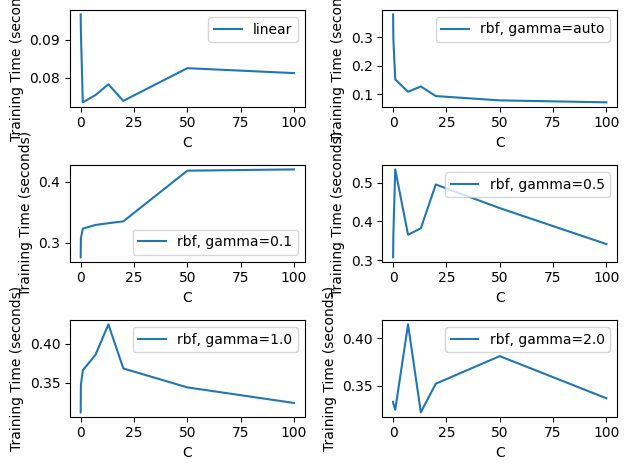

In [103]:
plt.plot(C_values, training_time_linear, label='linear')

for i in range(len(gamma_values)):
    plt.plot(C_values, training_time_rbf[i], label='rbf, gamma=' + str(gamma_values[i]))

plt.xlabel('C')
plt.ylabel('Training Time (seconds)')

plt.legend()
plt.show()

fig, axs = plt.subplots(3, 2)
axs[0][0].plot(C_values, training_time_linear, label='linear')
axs[0][0].set_xlabel('C')
axs[0][0].set_ylabel('Training Time (seconds)')
axs[0][0].legend()

for i, gamma in enumerate(gamma_values):
    figure_index = i + 1
    figure_row = figure_index // 2
    figure_col = figure_index % 2
    axs[figure_row][figure_col].plot(C_values, training_time_rbf[i], label='rbf, gamma=' + str(gamma))
    axs[figure_row][figure_col].set_xlabel('C')
    axs[figure_row][figure_col].set_ylabel('Training Time (seconds)')
    axs[figure_row][figure_col].legend()

plt.tight_layout()
plt.show()



### Review SVM

### References